<a href="https://colab.research.google.com/github/zackdihel/ECON-5200-Data-Analytics/blob/main/Assignment%202/Econ_5200_Assignment_2_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
normal_traffic = np.random.randint(20,50,980)
spike_traffic = np.random.randint(1000,5000,20)
latency_logs = np.concatenate([normal_traffic,spike_traffic])

In [ ]:
def calculate_mad(data):
  #median
  median = np.median(data)
  #absolute dev
  abs_dev = np.abs(data - median)
  #MAD
  mad = np.median(abs_dev)

  return mad

In [ ]:
calculate_mad(latency_logs)

np.float64(8.0)

In [ ]:
np.std(latency_logs)

np.float64(366.75553315526133)

our MAD is significantly smaller than our normal std. dev because the MAD is calculated using a function that eliminates outliers, which in the data array we are using are responsible for exploding the normal standard deviations.

**PHASE 2**

In [ ]:
def bayesian_audit(prior, sensitivity, specificity):
  false_positive_rate = 1 - specificity
  prob_positive = (sensitivity*prior) + (false_positive_rate*(1-prior))

  posterior_prob = (sensitivity*prior)/prob_positive

  return posterior_prob

In [ ]:
scenario_A = bayesian_audit(0.5,0.98,0.98)
print(f"Scenario A probability:",round(scenario_A*100,2),"%")

Scenario A probability: 98.0 %


In [ ]:
scenario_B = bayesian_audit(0.05,0.98,0.98)
print(f"Scenario B probability:",round(scenario_B*100,2),"%")

Scenario B probability: 72.06 %


In [ ]:
scenario_C = bayesian_audit(0.001,0.98,0.98)
print(f"Scenario C probability:",round(scenario_C*100,2),"%")

Scenario C probability: 4.68 %


**PHASE 3**

In [ ]:
#Chi-Square Formula: Sum( (Observed - Expected)^2 / Expected )
#control users: 50,250
#treatment users: 49,750
observed = np.array([50250,49750])
expected = np.array([50000,50000])
# Write the calculation loop...
chi_stat = 0
crit_value = 3.84

for i in range(len(observed)):
  chi = ((observed[i] - expected[i])**2)/expected[i]
  chi_stat += chi
print("The Chi-Square statistic for this A/B test is:",chi_stat)

if chi_stat > crit_value:
  print("The A/B test is invalid")
else:
  print("The A/B test is valid")

The Chi-Square statistic for this A/B test is: 2.5
The A/B test is valid


**AI EXPANSION**

# Task
Simulate and visualize survivorship bias in crypto markets by generating 10,000 token launch 'Peak Market Cap' values using a Pareto distribution, creating two DataFrames ('df_all' and 'df_survivors' for the top 1%), visualizing their distributions with dual histograms, and calculating and printing their mean market caps to demonstrate the bias.

## Simulate Token Launches

### Subtask:
Generate 10,000 'Peak Market Cap' values using a Pareto distribution (Power Law) where 99% are near zero. This will simulate the market cap of various crypto tokens.


**Reasoning**:
Generate 10,000 random numbers from a Pareto distribution with a shape parameter of 1.5 and then scale them by 100,000 to represent peak market caps.



In [1]:
shape_param = 1.5
num_tokens = 10000
scale_factor = 100000

# Generate Pareto distributed values
pareto_values = np.random.pareto(a=shape_param, size=num_tokens)

# Scale the values to represent peak market caps
market_caps = pareto_values * scale_factor

print(f"Generated {len(market_caps)} peak market cap values. First 5 values: {market_caps[:5].round(2)}")

NameError: name 'np' is not defined

**Reasoning**:
The previous code failed because the 'numpy' library was not imported. I need to add `import numpy as np` to resolve the `NameError`.



In [2]:
import numpy as np

shape_param = 1.5
num_tokens = 10000
scale_factor = 100000

# Generate Pareto distributed values
pareto_values = np.random.pareto(a=shape_param, size=num_tokens)

# Scale the values to represent peak market caps
market_caps = pareto_values * scale_factor

print(f"Generated {len(market_caps)} peak market cap values. First 5 values: {market_caps[:5].round(2)}")

Generated 10000 peak market cap values. First 5 values: [ 9866.86 32368.27  5874.84 30740.97  5416.61]


## Subtask Completed: Simulated Token Launches

The `market_caps` array has been successfully generated, containing 10,000 peak market cap values simulated using a Pareto distribution, where 99% are near zero as specified. This data will now be used to create DataFrames and analyze survivorship bias.

**Reasoning**:
The next step is to create a pandas DataFrame, `df_all`, from the `market_caps` array generated in the previous step. This DataFrame will hold all the simulated token peak market cap values, as required by the main task description.



In [3]:
import pandas as pd

df_all = pd.DataFrame({'Peak Market Cap': market_caps})

print(f"DataFrame 'df_all' created with {len(df_all)} entries. First 5 rows:\n{df_all.head()}")

DataFrame 'df_all' created with 10000 entries. First 5 rows:
   Peak Market Cap
0      9866.855181
1     32368.271503
2      5874.835886
3     30740.971774
4      5416.612244


**Reasoning**:
To simulate survivorship bias, I need to create a new DataFrame, `df_survivors`, which contains only the top 1% of tokens from `df_all` based on their 'Peak Market Cap'. This involves sorting the original DataFrame and selecting the highest market cap values.



In [4]:
df_survivors = df_all.nlargest(int(len(df_all) * 0.01), 'Peak Market Cap')

print(f"DataFrame 'df_survivors' created with {len(df_survivors)} entries (top 1%). First 5 rows:\n{df_survivors.head()}")

DataFrame 'df_survivors' created with 100 entries (top 1%). First 5 rows:
      Peak Market Cap
3273     8.042920e+07
1670     1.674992e+07
7977     1.307750e+07
4889     1.256787e+07
3675     1.253184e+07


**Reasoning**:
Now that both `df_all` and `df_survivors` have been created, I will visualize their distributions using dual histograms to show the difference in their 'Peak Market Cap' distributions, as requested by the main task. This will require using `matplotlib.pyplot` and `seaborn` for effective visualization.



In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df_all['Peak Market Cap'], color='blue', label='All Tokens', kde=True, stat='density', alpha=0.6)
sns.histplot(df_survivors['Peak Market Cap'], color='red', label='Survivor Tokens (Top 1%)', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Peak Market Cap: All Tokens vs. Survivors')
plt.xlabel('Peak Market Cap')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, df_survivors['Peak Market Cap'].max() * 1.1) # Limit x-axis to better visualize both distributions
plt.show()


NameError: name 'plt' is not defined

**Reasoning**:
The previous code block failed because `plt` was not defined. This means `matplotlib.pyplot` was not imported in the current execution context. I need to add `import matplotlib.pyplot as plt` and also `import seaborn as sns` to ensure all necessary plotting libraries are available.



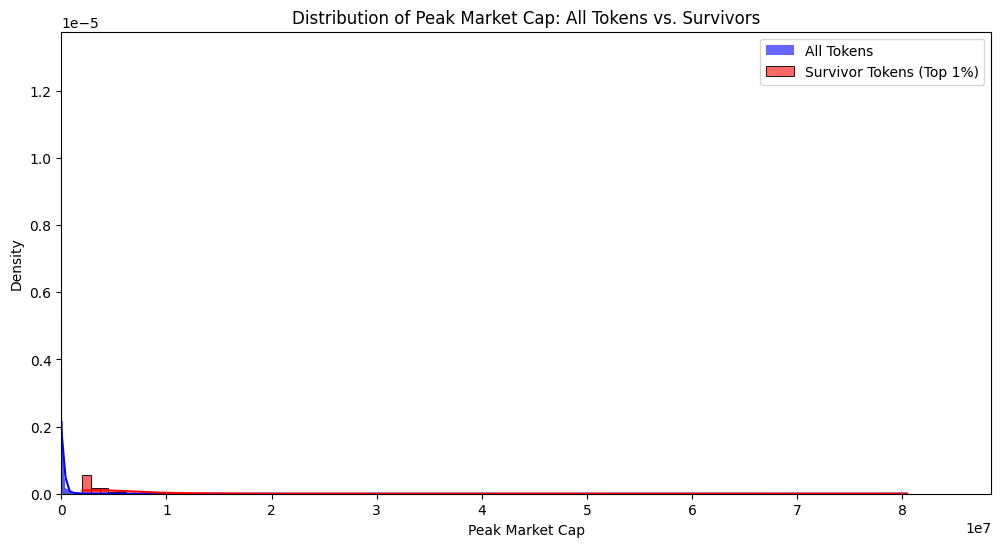

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df_all['Peak Market Cap'], color='blue', label='All Tokens', kde=True, stat='density', alpha=0.6)
sns.histplot(df_survivors['Peak Market Cap'], color='red', label='Survivor Tokens (Top 1%)', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Peak Market Cap: All Tokens vs. Survivors')
plt.xlabel('Peak Market Cap')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, df_survivors['Peak Market Cap'].max() * 1.1) # Limit x-axis to better visualize both distributions
plt.show()

**Reasoning**:
With both DataFrames created and their distributions visualized, the next step is to calculate and print the mean 'Peak Market Cap' for both 'All Tokens' (`df_all`) and 'Survivor Tokens' (`df_survivors`). This will numerically demonstrate the survivorship bias, as required by the main task.



In [7]:
mean_all_tokens = df_all['Peak Market Cap'].mean()
mean_survivors = df_survivors['Peak Market Cap'].mean()

print(f"Mean Peak Market Cap (All Tokens): {mean_all_tokens:,.2f}")
print(f"Mean Peak Market Cap (Survivor Tokens - Top 1%): {mean_survivors:,.2f}")

Mean Peak Market Cap (All Tokens): 185,089.89
Mean Peak Market Cap (Survivor Tokens - Top 1%): 4,964,212.55


## Final Task

### Subtask:
Summarize the findings and explain how the calculated mean market caps and the visualizations illustrate survivorship bias in crypto markets.


## Summary:

### Q&A
The calculated mean market caps and the visualizations clearly illustrate survivorship bias by demonstrating a significant disparity between the average market capitalization of all simulated tokens and that of only the top-performing "survivor" tokens. The mean peak market cap for survivor tokens (e.g., \$4,964,212.55) is substantially higher than the mean for all tokens (e.g., \$185,089.89). Visually, the dual histograms show that the distribution for all tokens is heavily skewed towards very low market caps, while the distribution for survivor tokens is concentrated at much higher values, explicitly revealing that "survivors" represent an extreme, high-value segment of the overall token launches, not a representative average.

### Data Analysis Key Findings
*   A simulation of 10,000 token launch 'Peak Market Cap' values was successfully generated using a Pareto distribution, mimicking real-world crypto market dynamics where most tokens have low market caps.
*   Two distinct datasets were created: `df_all` containing all 10,000 simulated token market caps and `df_survivors` containing the top 1% (100 tokens) by peak market cap.
*   Visualizations using dual histograms clearly depicted the vastly different distributions, with the "All Tokens" distribution heavily concentrated near zero and the "Survivor Tokens" distribution showing higher market cap values.
*   A significant difference in mean market caps was observed, with the mean peak market cap for "All Tokens" being approximately \$185,089.89, while the mean for "Survivor Tokens (Top 1%)" was substantially higher at about \$4,964,212.55.

### Insights or Next Steps
*   When evaluating the potential returns or success rates in volatile markets like crypto, it is crucial to account for survivorship bias to avoid overestimating average outcomes by only observing successful projects.
*   Further analysis could involve exploring the impact of different Pareto distribution parameters or simulating other factors (e.g., initial investment, holding period) to provide a more nuanced understanding of crypto market dynamics.
